#### [ Fish 길이에 따른 무게 예측 ]
- 데이터셋 : fish.csv
- 피쳐 : 길이
- 타겟 : 무게
- 학습방법 : 지도학습 - 회귀
- 알고리즘 : 선형회귀 

In [30]:
# [1] 모듈 로딩
from sklearn.linear_model import LinearRegression                       # 머신러닝 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error     # 성능평가 모듈 
from sklearn.model_selection import train_test_split                    # 데이터셋 분리 모듈
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from function import checkModel

In [31]:
# [2] 데이터 수집 및 전처리 
fish_df = pd.read_csv('fish.csv', engine='python', usecols=[1,2])
fish_df = fish_df[:35]
display(fish_df)

Weight  Length
0    242.0    25.4
1    290.0    26.3
2    340.0    26.5
3    363.0    29.0
4    430.0    29.0
5    450.0    29.7
6    500.0    29.7
7    390.0    30.0
8    450.0    30.0
9    500.0    30.7
10   475.0    31.0
11   500.0    31.0
12   500.0    31.5
13   340.0    32.0
14   600.0    32.0
15   600.0    32.0
16   700.0    33.0
17   700.0    33.0
18   610.0    33.5
19   650.0    33.5
20   575.0    34.0
21   685.0    34.0
22   620.0    34.5
23   680.0    35.0
24   700.0    35.0
25   725.0    35.0
26   720.0    35.0
27   714.0    36.0
28   850.0    36.0
29  1000.0    37.0
30   920.0    38.5
31   955.0    38.5
32   925.0    39.5
33   975.0    41.0
34   950.0    41.0

<Axes: xlabel='Length', ylabel='Weight'>

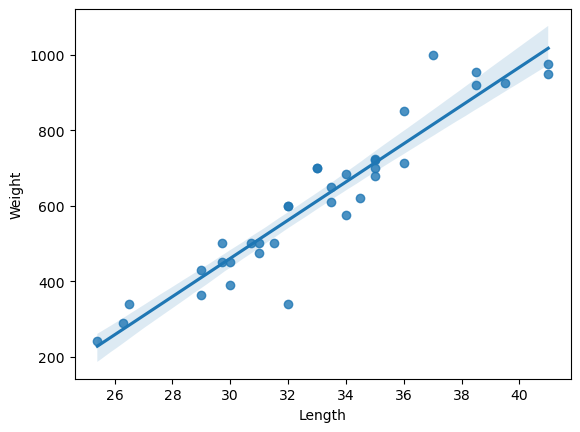

In [32]:
# [3] 데이터 분석
sns.regplot(x='Length', y='Weight', data=fish_df)

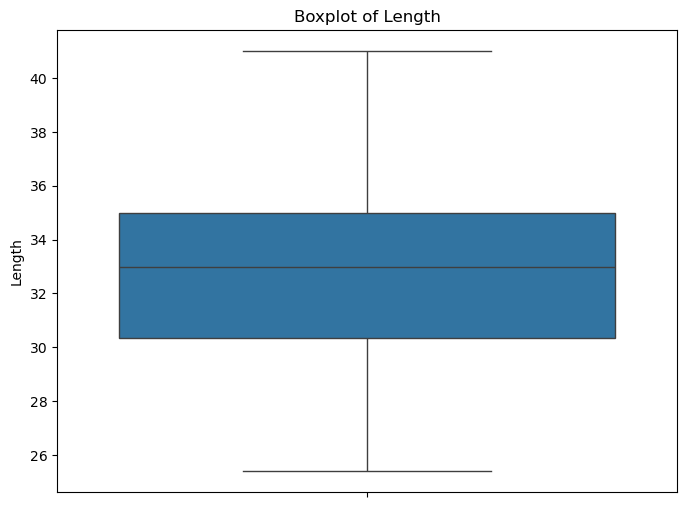

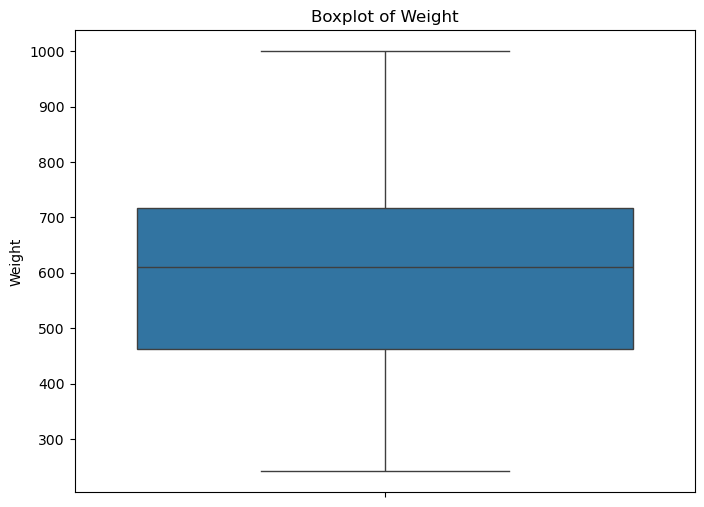

In [33]:
# Length에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y='Length', data=fish_df)
plt.title('Boxplot of Length')
plt.show()

# Weight에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y='Weight', data=fish_df)
plt.title('Boxplot of Weight')
plt.show()

In [34]:
# [4] 학습 방법 결정  
# 선형회귀 알고리즘 객체 / 인스턴스 생성 
fish_model = LinearRegression()


In [35]:
# 데이터셋 준비 => 학습용, 검증용, 테스트용 
featureDF = fish_df[['Length']] # 2차원
targetSR = fish_df['Weight']    # 1차원 
# 학습용 : 테스트용 = 70:30 
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

In [36]:

fish_model.fit(x_train, y_train)

LinearRegression()

In [37]:
# [5] 과대적합 확인
trainDS = (x_train, y_train)  # (데이터, 라벨)의 형태
testDS = (x_test, y_test) 
checkModel(trainDS, testDS, fish_model)

Score       RMSE
Train  0.908970  60.391757
Test   0.709195  82.588018

In [38]:
# 학습 결과 분석
# - 모델 적합도 : Train > Test : 과대적합
# - 비용 계산값 : Train < Test : 과대적합

# 해결방안
# - 과도한 반복학습 : scikit-learn 에서는 개발자 제어 불가
# - 모델 복잡성 : 피쳐가 많은가? 피쳐는 1개밖에 없음 
# - 데이터 충분성 : 데이터 충분하지 않음
# - 해당 알고리즘의 결과물 분석 : 선형식과 데이터의 관계 -> 약간 곡선으로 가야된다! 

In [39]:
# [모델 성능평가에서의 문제점 개선을 위한 추가 작업]
# - 손실/비용 함수 값이 큼 -> 직선을 곡선의 형태로 수식  
# - 기존 존재하는 피쳐를 활용해서 피쳐 생성 => 다항회귀

In [40]:
# [6] 특성공학 => 피쳐 생성 후 추가 
# - 관련 모듈 로딩 
# - 학습 진행 전, 전처리 단계에서 피쳐 추가

In [41]:
# [6-1] 새로운 모듈!
from sklearn.preprocessing import PolynomialFeatures  # 다항식


In [42]:
# 학습용/테스트용 데이터셋 피쳐 추가
poly = PolynomialFeatures()

# 학습용 피쳐 제공 (학습용을 기준으로 정보 제공)
poly.fit(x_train) 

# 학습용/테스트용 피쳐 추가
poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

print(f'[학습용 피쳐] => {type(poly_train)}')
print(f'[테스트용 피쳐] => {type(poly_test)}')


[학습용 피쳐] => <class 'numpy.ndarray'>
[테스트용 피쳐] => <class 'numpy.ndarray'>


In [43]:
# [7] 재학습  

# 선형회귀 인스턴스 생성
model = LinearRegression()

# 학습 
model.fit(poly_train, y_train)

LinearRegression()

In [44]:
# 모델 파라미터
print(f'coef_ : {model.coef_}')
print(f'intercept_ : {model.intercept_}')

coef_ : [ 0.         83.73599434 -0.50125984]
intercept_ : -1584.6654259046718


In [45]:
# 재학습 평가 

# [8-1] 시각화
import numpy as np

# 곡선 회귀식에 대입할 데이터 
x = np.linspace(1, 42, 42) # 1 <= ~ <= 42 사이 42개(기본값은 50개) 데이터 생성 
print('shape : ', x.shape)
print(x)

shape :  (42,)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]


In [46]:
# 곡선회귀식 : y = x^0*w0 + x^1*w1 + x^2*w2 + b
# n의 0승은 1
y = (1 * model.coef_[0]) + (x * model.coef_[1]) + ((x ** 2)  * model.coef_[2]) + model.intercept_